In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import missingno as msno

In [2]:
# load in data
data = pd.read_csv('sensor.csv')

In [ ]:
# check data
data.head()

In [3]:
# replace 0 with NaN
data = data.replace(0, np.nan)

<AxesSubplot:>

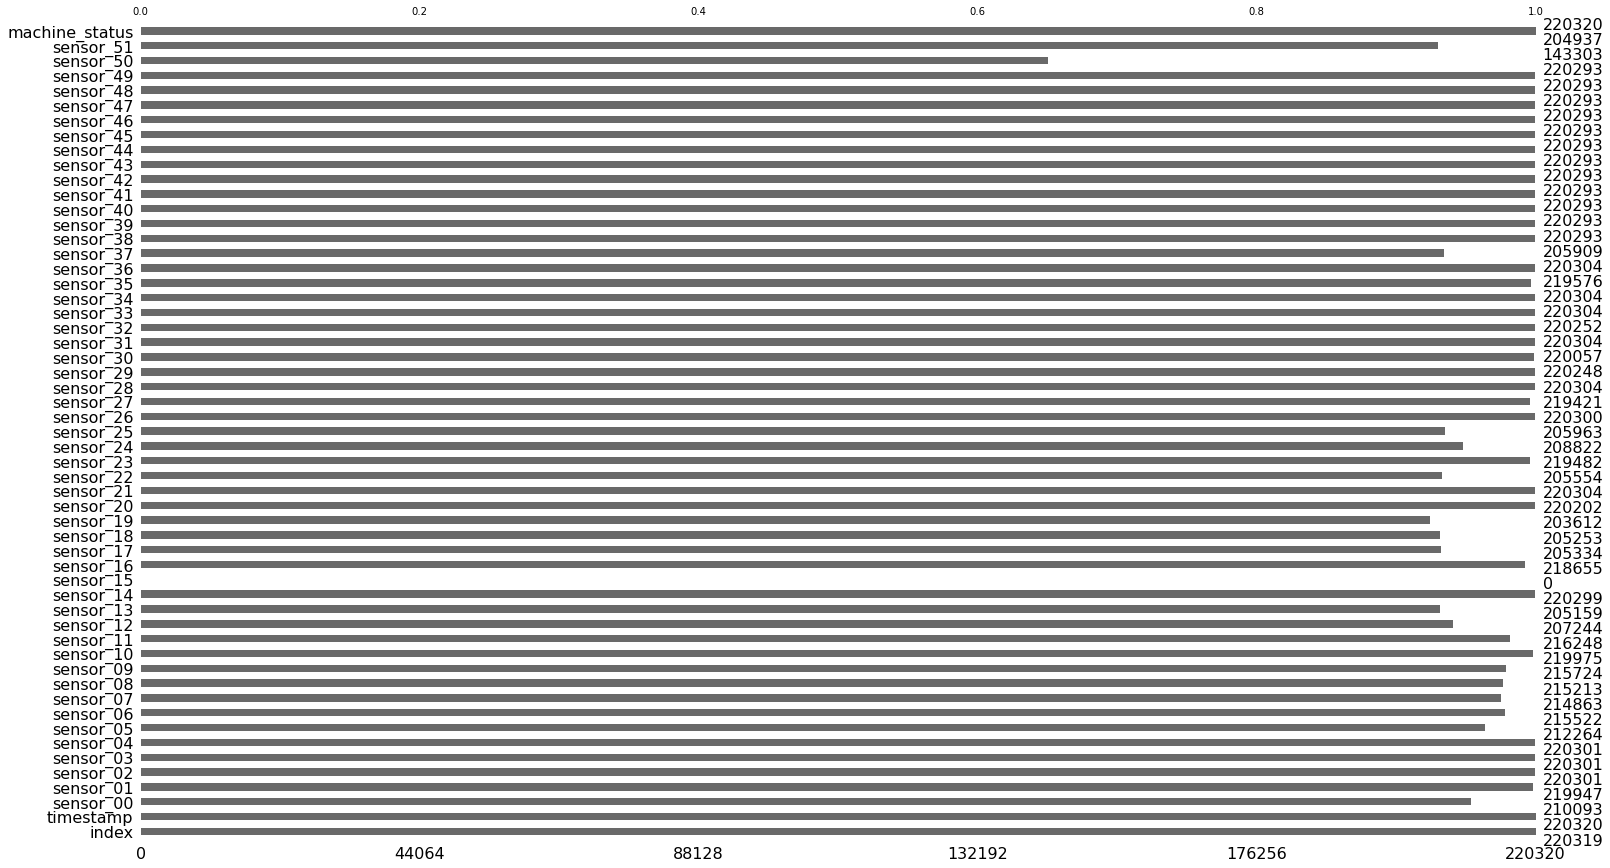

In [4]:
# check missing data volume
msno.bar(data)

<AxesSubplot:>

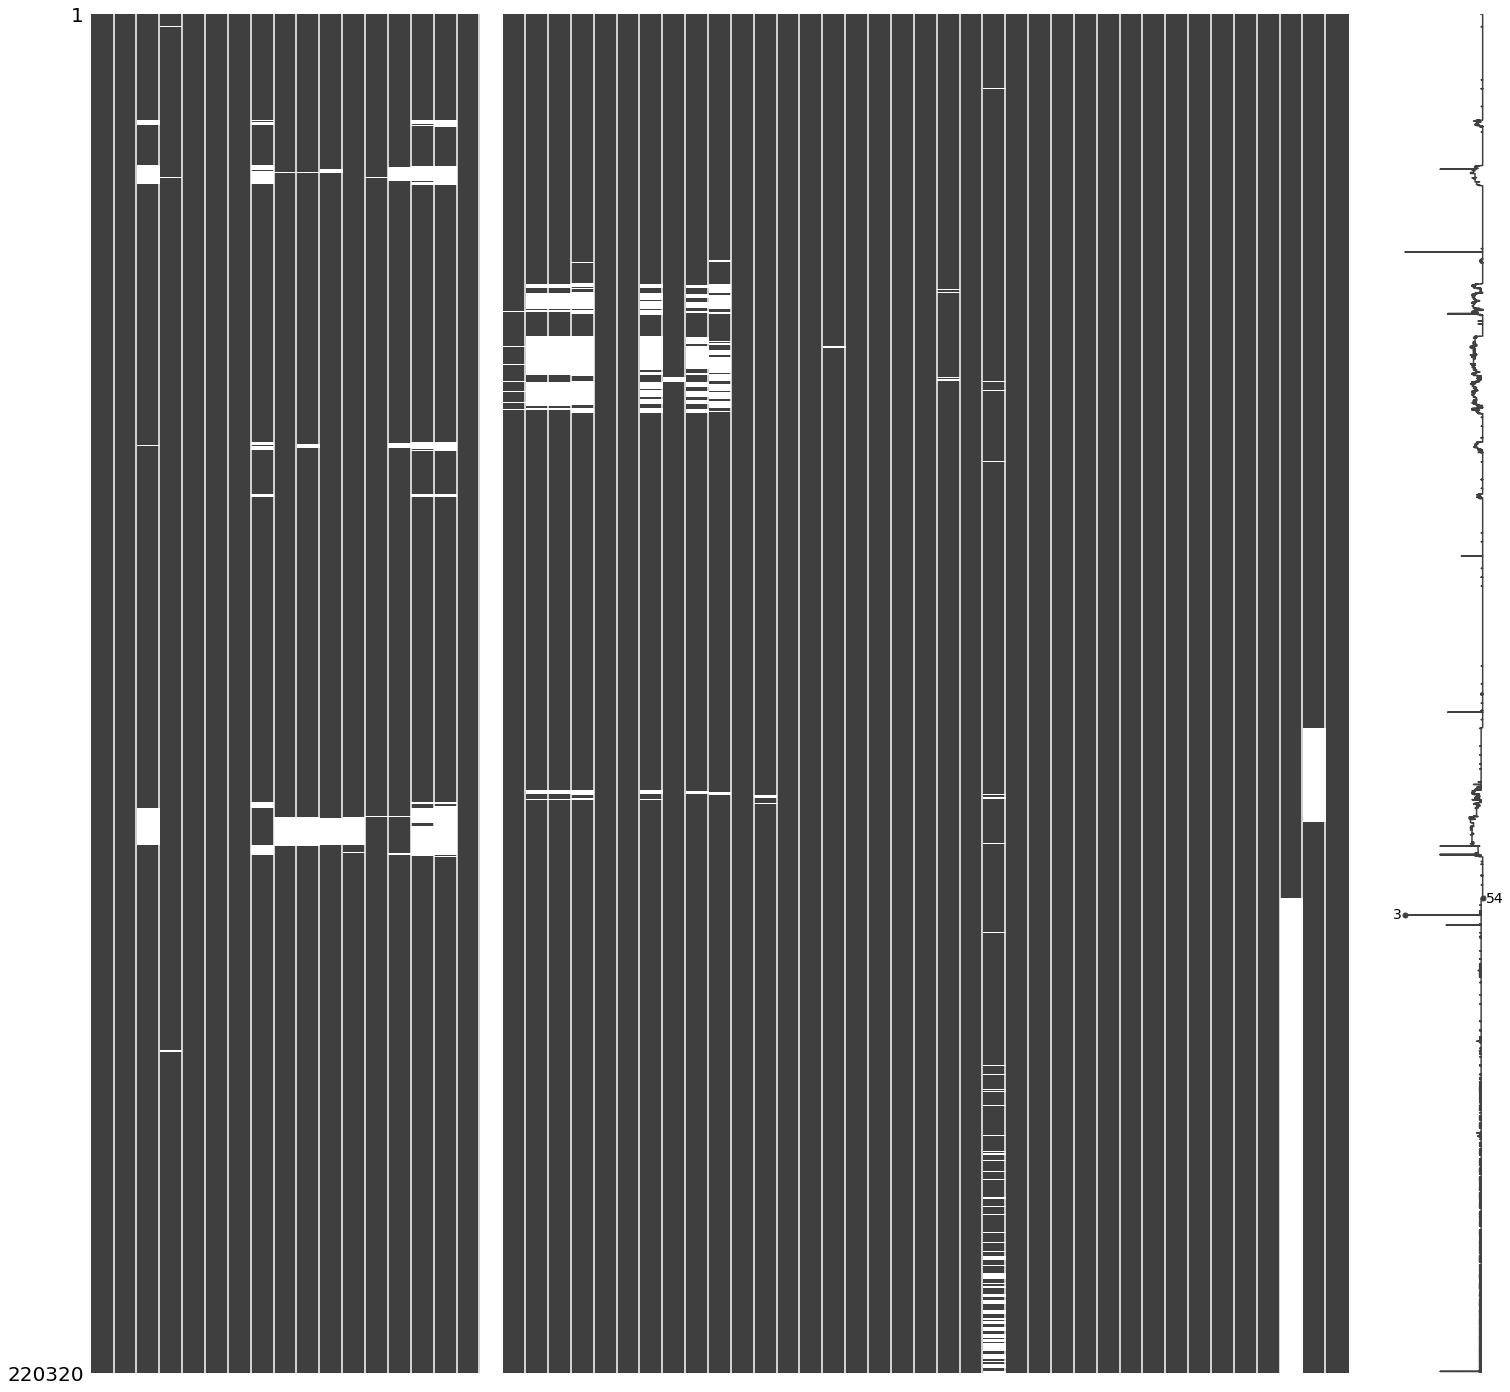

In [5]:
# check missing data distribution
msno.matrix(data, figsize=(25, 25))

In [6]:
# split out anomalous data
data_anom = data[data.machine_status != 'NORMAL']

<AxesSubplot:>

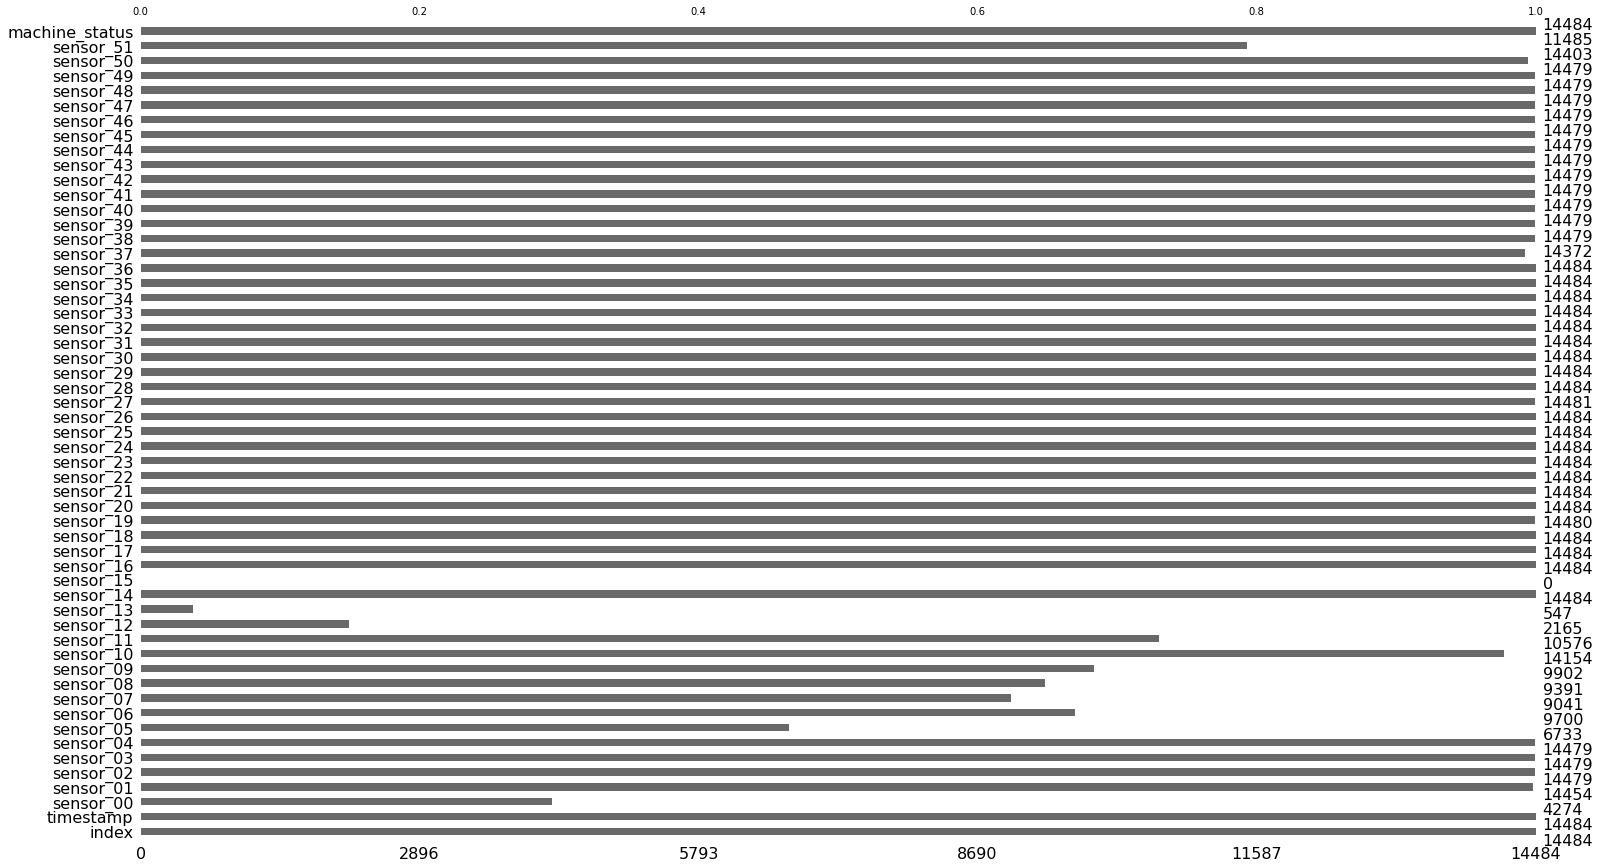

In [7]:
# check missing data volume
msno.bar(data_anom)

<AxesSubplot:>

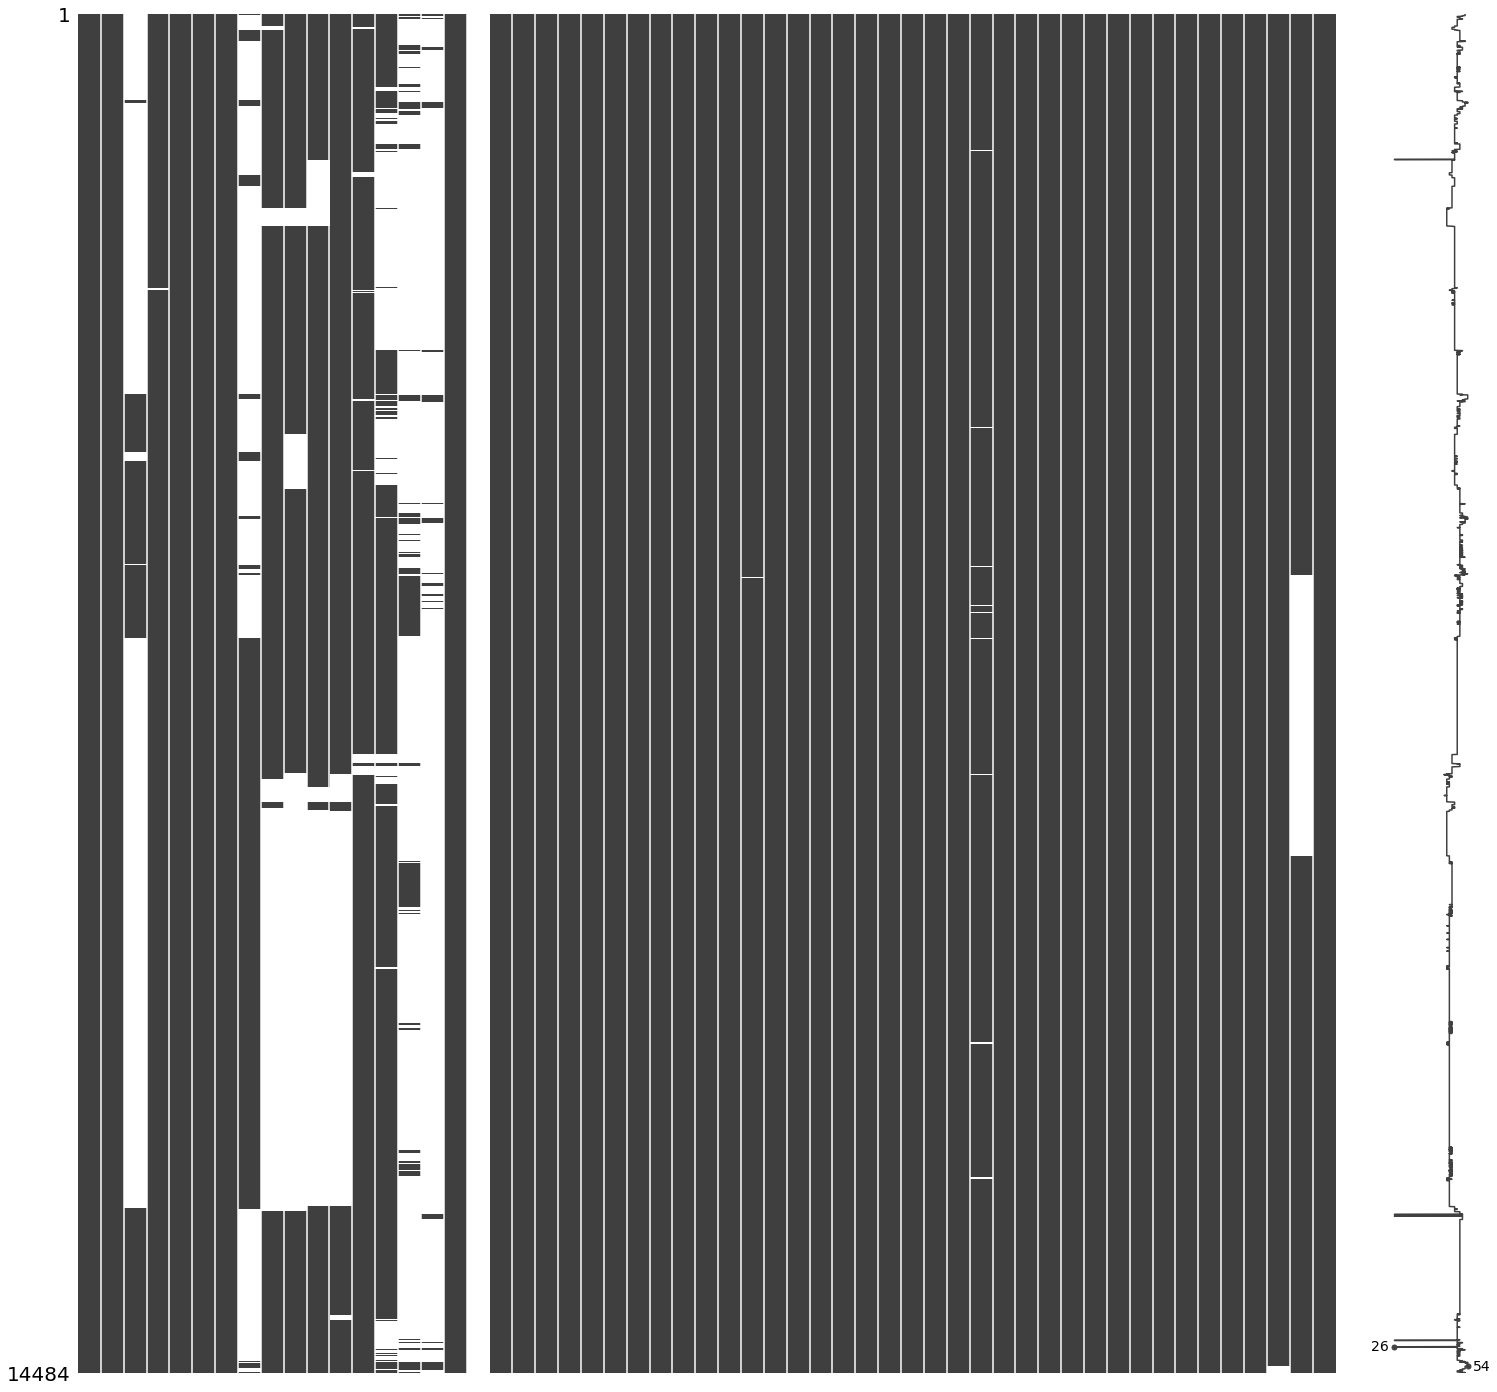

In [8]:
# check missing data distribution
msno.matrix(data_anom, figsize=(25, 25))

In [9]:
# drop sensors with tooooooo many missing values
data_col_reduced = data.drop(['sensor_00',
                              'sensor_05', 
                              'sensor_06', 
                              'sensor_07', 
                              'sensor_08', 
                              'sensor_09', 
                              'sensor_11', 
                              'sensor_12', 
                              'sensor_13', 
                              'sensor_15',
                              'sensor_50',   
                              'sensor_51'], axis=1)

<AxesSubplot:>

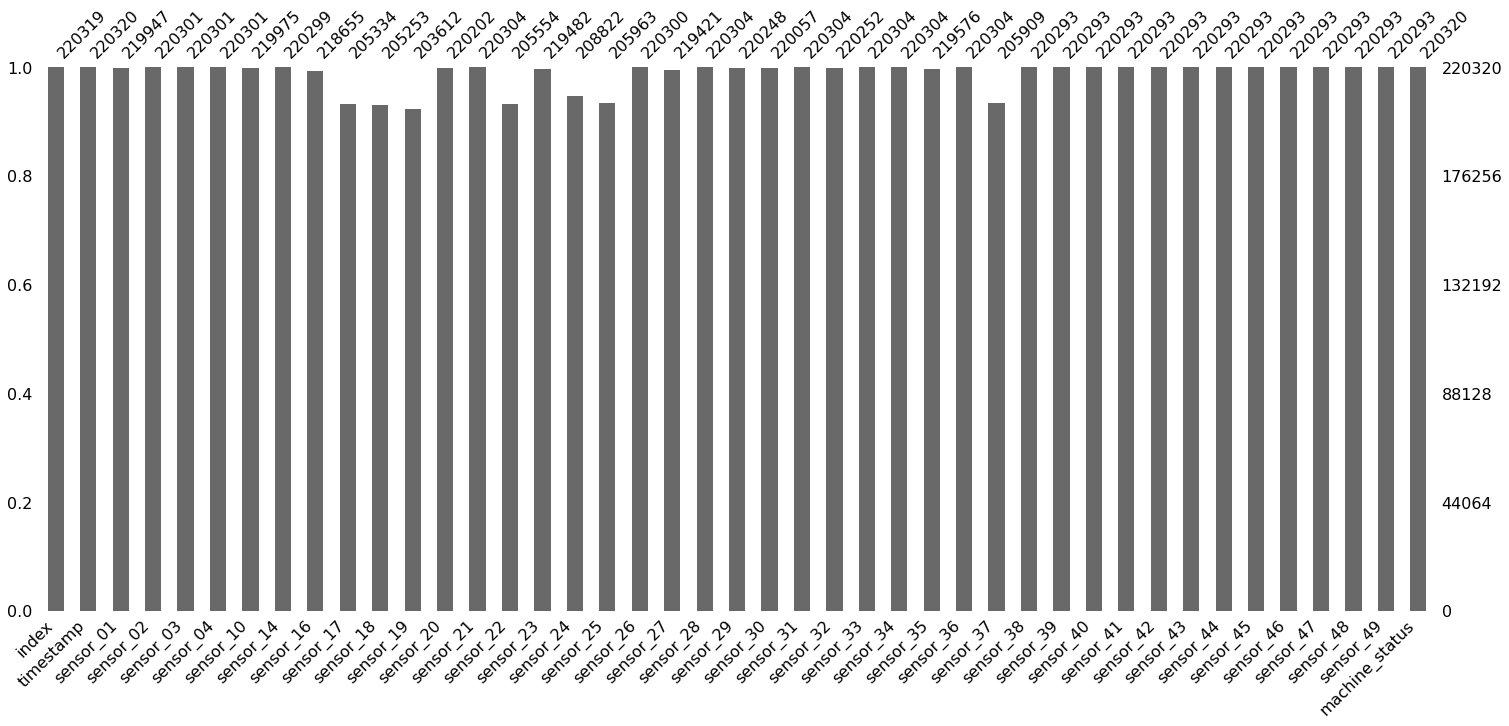

In [10]:
# check missing data again
msno.bar(data_col_reduced)

<AxesSubplot:>

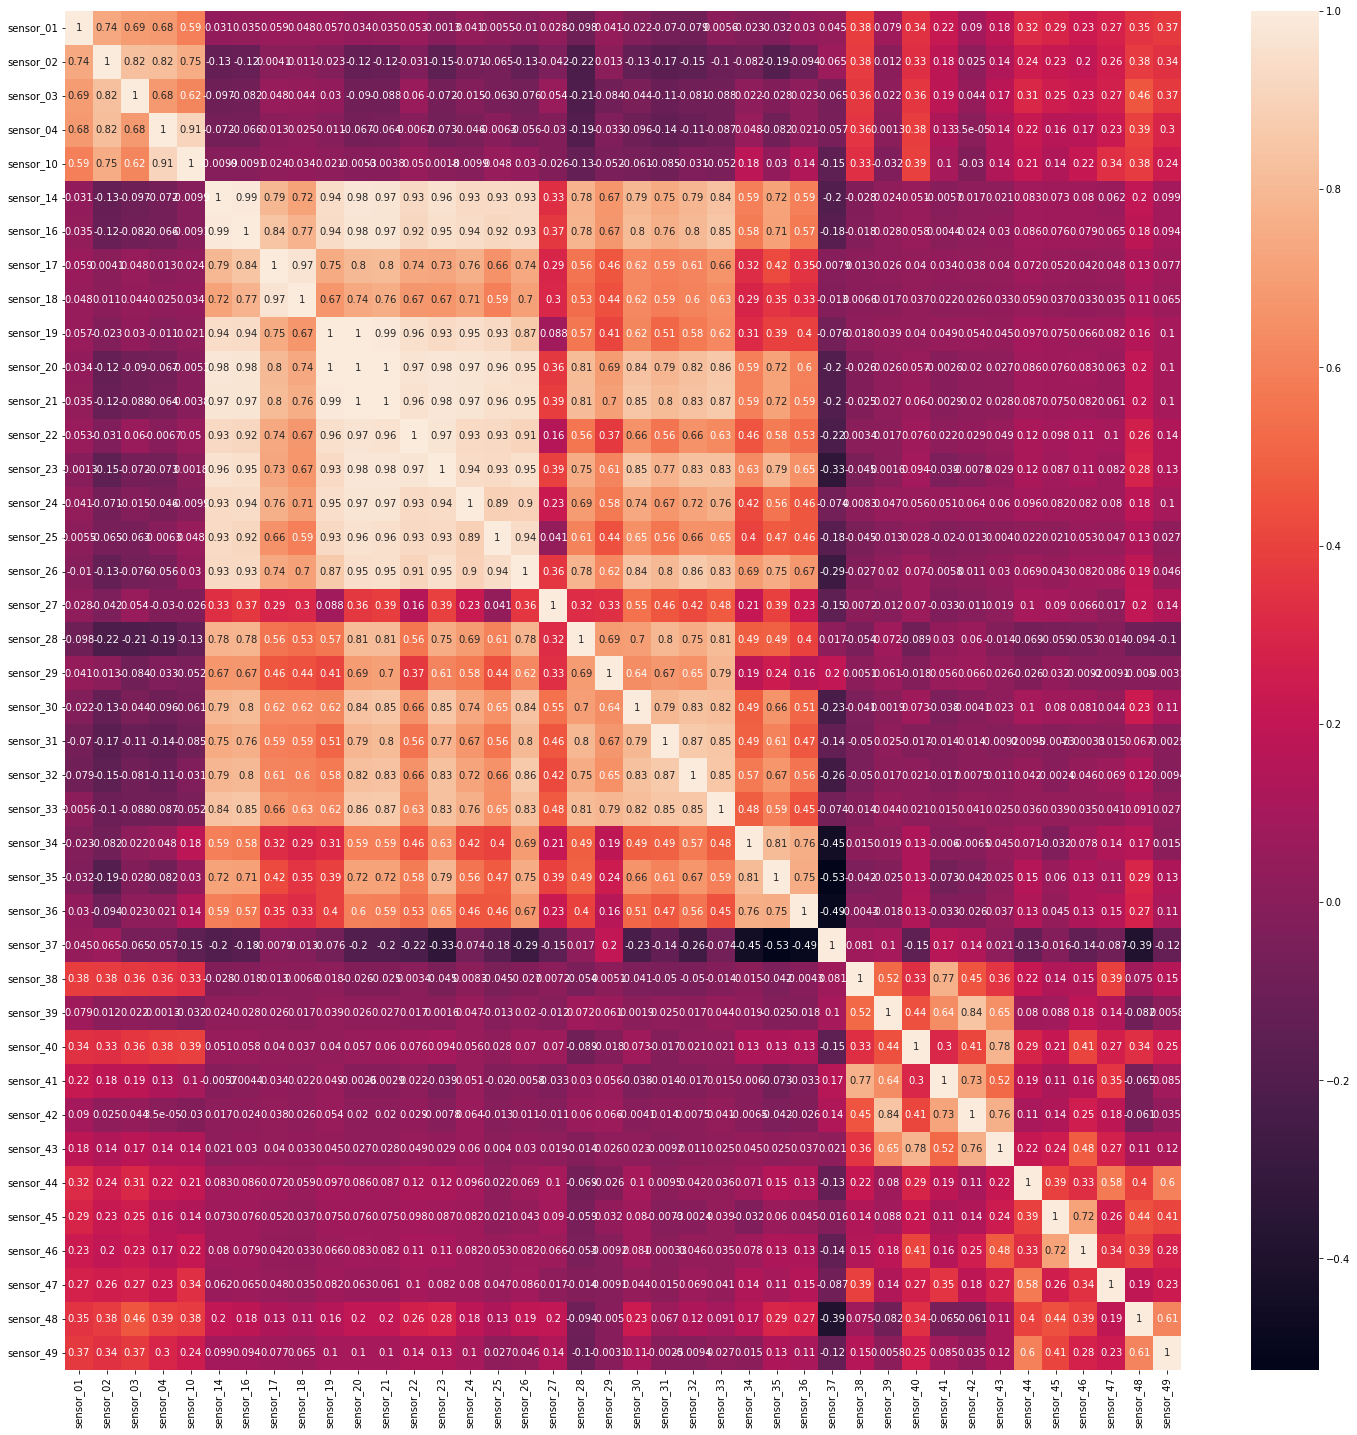

In [11]:
# Compute the correlation matrix
corr = data_col_reduced.drop(['index', 'timestamp', 'machine_status'], axis=1).corr()

# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Draw corr heatmap
sns.heatmap(corr, annot=True, ax=ax)

In [ ]:
# drop sensors that are toooooooo similar to each other
data_col_reduced_final = data.drop(['sensor_00',
                                    'sensor_05', 
                                    'sensor_06', 
                                    'sensor_07', 
                                    'sensor_08', 
                                    'sensor_09', 
                                    'sensor_11', 
                                    'sensor_12', 
                                    'sensor_13', 
                                    'sensor_15',
                                    'sensor_16',
                                    'sensor_19',
                                    'sensor_21',
                                    'sensor_50',   
                                    'sensor_51'], axis=1)

In [ ]:
data_col_reduced_final

In [ ]:
# drop all rows with NaN values
# data_final_unscaled = data_col_reduced_final.dropna()

In [ ]:
# check shape of dataframe
data_final_unscaled.shape

In [ ]:
# check distribution of labels
data_final_unscaled['machine_status'].value_counts()

In [ ]:
from sklearn.preprocessing import StandardScaler 

ans = StandardScaler().fit_transform(data_col_reduced_final.drop(['index', 'timestamp', 'machine_status'], axis=1))

In [ ]:
ans

In [ ]:
data_final = pd.DataFrame(data=ans, columns=[[
    'sensor_01',
    'sensor_02',
    'sensor_03',
    'sensor_04',
    'sensor_10',
    'sensor_14',
    'sensor_17',
    'sensor_18',
    'sensor_20',
    'sensor_22',
    'sensor_23',
    'sensor_24',
    'sensor_25',
    'sensor_26',
    'sensor_27',
    'sensor_28',
    'sensor_29',
    'sensor_30',
    'sensor_31',
    'sensor_32',
    'sensor_33',
    'sensor_34',
    'sensor_35',
    'sensor_36',
    'sensor_37',
    'sensor_38',
    'sensor_39',
    'sensor_40',
    'sensor_41',
    'sensor_42',
    'sensor_43',
    'sensor_44',
    'sensor_45',
    'sensor_46',
    'sensor_47',
    'sensor_48',
    'sensor_49'
]])

In [ ]:
data_col_reduced_final['machine_status'].value_counts()

In [ ]:
data_final = pd.read_csv('sensor_scaled_cleaned.csv', index_col='index')

In [ ]:
data_final['machine_status']

# DO NOT RUN BEYOND THIS CELL 
(your computer may collapse into a blackhole)

In [ ]:
# split out normal data for feature generation
data_final_norm = data_final[data_final['machine_status'] == 'NORMAL']

In [ ]:
data_final_norm.shape

In [ ]:
# supplemental function to check if indices in a window are consecutive
def checkConsecutive(seq):
    n = len(seq) - 1
    return (sum(np.diff(seq) == 1) >= n)

In [ ]:
# define window size and container for 8 threads
window_size = 37

normal_sample_0 = np.empty((0, 1369))
normal_sample_1 = np.empty((0, 1369))
normal_sample_2 = np.empty((0, 1369))
normal_sample_3 = np.empty((0, 1369))
normal_sample_4 = np.empty((0, 1369))
normal_sample_5 = np.empty((0, 1369))
normal_sample_6 = np.empty((0, 1369))
normal_sample_7 = np.empty((0, 1369))

In [ ]:
# define functions that will be run on each threads (sketchy but works)
def construct_features_0():
    global normal_sample_0
    for idx in range(0, 21500):
        temp = data_final_norm.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            normal_sample_0 = np.append(normal_sample_0, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)
        
def construct_features_1():
    global normal_sample_1
    for idx in tqdm(range(21501, 43000)):
        temp = data_final_norm.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            normal_sample_1 = np.append(normal_sample_1, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)
        
def construct_features_2():
    global normal_sample_2
    for idx in range(43001, 64500):
        temp = data_final_norm.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            normal_sample_2 = np.append(normal_sample_2, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)
        
def construct_features_3():
    global normal_sample_3
    for idx in range(64501, 86000):
        temp = data_final_norm.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            normal_sample_3 = np.append(normal_sample_3, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)
        
def construct_features_4():
    global normal_sample_4
    for idx in range(86001, 107500):
        temp = data_final_norm.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            normal_sample_4 = np.append(normal_sample_4, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)
        
def construct_features_5():
    global normal_sample_5
    for idx in range(107501, 129000):
        temp = data_final_norm.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            normal_sample_5 = np.append(normal_sample_5, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)
        
def construct_features_6():
    global normal_sample_6
    for idx in range(129001, 150500):
        temp = data_final_norm.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            normal_sample_6 = np.append(normal_sample_6, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)
        
def construct_features_7():
    global normal_sample_7
    for idx in range(150501, 171954):
        temp = data_final_norm.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            normal_sample_7 = np.append(normal_sample_7, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)
        


In [ ]:
# multithreading to the moon
import threading

threads = []

# construct threads
t1 = threading.Thread(target=construct_features_0)
t2 = threading.Thread(target=construct_features_1)
t3 = threading.Thread(target=construct_features_2)
t4 = threading.Thread(target=construct_features_3)
t5 = threading.Thread(target=construct_features_4)
t6 = threading.Thread(target=construct_features_5)
t7 = threading.Thread(target=construct_features_6)
t8 = threading.Thread(target=construct_features_7)

# add threads to thread array
threads.append(t1)
threads.append(t2)
threads.append(t3)
threads.append(t4)
threads.append(t5)
threads.append(t6)
threads.append(t7)
threads.append(t8)

# start all threads
for thread in threads:
    thread.start()
for thread in threads:
    thread.join()

In [ ]:
# write to a file
with open('features_scaled.csv', 'ab') as f:
    np.savetxt(f, normal_sample_0, delimiter=',', newline='\n')
    np.savetxt(f, normal_sample_1, delimiter=',', newline='\n')
    np.savetxt(f, normal_sample_2, delimiter=',', newline='\n')
    np.savetxt(f, normal_sample_3, delimiter=',', newline='\n')
    np.savetxt(f, normal_sample_4, delimiter=',', newline='\n')
    np.savetxt(f, normal_sample_5, delimiter=',', newline='\n')
    np.savetxt(f, normal_sample_6, delimiter=',', newline='\n')
    np.savetxt(f, normal_sample_7, delimiter=',', newline='\n')

In [ ]:
broken_idx = data_final[data_final['machine_status'] == 'BROKEN'].index

In [ ]:
# indices for all broken status
broken_idx = [17155, 24510, 69318, 77790, 128040, 141131, 166440]

In [ ]:
# define window size and container for each thread again
window_size = 37

anom_sample_0 = np.empty((0, 1369))
anom_sample_1 = np.empty((0, 1369))
anom_sample_2 = np.empty((0, 1369))
anom_sample_3 = np.empty((0, 1369))
anom_sample_4 = np.empty((0, 1369))
anom_sample_5 = np.empty((0, 1369))
anom_sample_6 = np.empty((0, 1369))

In [ ]:
# thought multithreading was needed but apparently not
def construct_features_anom_0():
    global anom_sample_0
    global broken_idx
    
    temp_anom = data_final.loc[lambda df: df.index >= broken_idx[0] - window_size + 1, :]
    idx = 0
    
    while temp_anom.iloc[idx+window_size-1]['machine_status'] != 'NORMAL':
        temp = temp_anom.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            anom_sample_0 = np.append(anom_sample_0, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)  
        idx = idx + 1
        
        
def construct_features_anom_1():
    global anom_sample_1
    global broken_idx
    
    temp_anom = data_final.loc[lambda df: df.index >= broken_idx[1] - window_size + 1, :]
    idx = 0
    
    while temp_anom.iloc[idx+window_size-1]['machine_status'] != 'NORMAL':
        temp = temp_anom.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            anom_sample_1 = np.append(anom_sample_1, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)  
        idx = idx + 1
        
        
def construct_features_anom_2():
    global anom_sample_2
    global broken_idx
    
    temp_anom = data_final.loc[lambda df: df.index >= broken_idx[2] - window_size + 1, :]
    idx = 0
    
    while temp_anom.iloc[idx+window_size-1]['machine_status'] != 'NORMAL':
        temp = temp_anom.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            anom_sample_2 = np.append(anom_sample_2, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)  
        idx = idx + 1
        
        
def construct_features_anom_3():
    global anom_sample_3
    global broken_idx
    
    temp_anom = data_final.loc[lambda df: df.index >= broken_idx[3] - window_size + 1, :]
    idx = 0
    
    while temp_anom.iloc[idx+window_size-1]['machine_status'] != 'NORMAL':
        temp = temp_anom.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            anom_sample_3 = np.append(anom_sample_3, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)  
        idx = idx + 1
        
        
def construct_features_anom_4():
    global anom_sample_4
    global broken_idx
    
    temp_anom = data_final.loc[lambda df: df.index >= broken_idx[4] - window_size + 1, :]
    idx = 0
    
    while temp_anom.iloc[idx+window_size-1]['machine_status'] != 'NORMAL':
        temp = temp_anom.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            anom_sample_4 = np.append(anom_sample_4, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)  
        idx = idx + 1
        
        
def construct_features_anom_5():
    global anom_sample_5
    global broken_idx
    
    temp_anom = data_final.loc[lambda df: df.index >= broken_idx[5] - window_size + 1, :]
    idx = 0
    
    while temp_anom.iloc[idx+window_size-1]['machine_status'] != 'NORMAL':
        temp = temp_anom.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            anom_sample_5 = np.append(anom_sample_5, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)  
        idx = idx + 1
        
        
def construct_features_anom_6():
    global anom_sample_6
    global broken_idx
    
    temp_anom = data_final.loc[lambda df: df.index >= broken_idx[6] - window_size + 1, :]
    idx = 0
    
    while temp_anom.iloc[idx+window_size-1]['machine_status'] != 'NORMAL':
        temp = temp_anom.iloc[idx: idx + window_size]
        if checkConsecutive(temp.index.to_numpy()):
            anom_sample_6 = np.append(anom_sample_6, temp.drop(['timestamp', 'machine_status'], axis=1).to_numpy().reshape(1, 1369), axis=0)  
        idx = idx + 1
    
    

In [ ]:
construct_features_anom_0()
construct_features_anom_1()
construct_features_anom_2()
construct_features_anom_3()
construct_features_anom_4()
construct_features_anom_5()
construct_features_anom_6()


In [ ]:
with open('features_anom_scaled.csv', 'ab') as f:
    np.savetxt(f, anom_sample_0, delimiter=',', newline='\n')
    np.savetxt(f, anom_sample_1, delimiter=',', newline='\n')
    np.savetxt(f, anom_sample_2, delimiter=',', newline='\n')
    np.savetxt(f, anom_sample_3, delimiter=',', newline='\n')
    np.savetxt(f, anom_sample_4, delimiter=',', newline='\n')
    np.savetxt(f, anom_sample_5, delimiter=',', newline='\n')
    np.savetxt(f, anom_sample_6, delimiter=',', newline='\n')
